## Starter code for assignment 1
This notebook contains the starter code for assignment 1, with unfinished sections for your to complete. Please work through it, and add your code where instructed. There are short-answer writen questions as well at the bottom of the notebook.

When you're finished, save and submit your completed notebook, including the output from your final run.

In [2]:
import matplotlib.pyplot as plt

# Display figures inline (rather than opening a new window)
%matplotlib inline

import numpy as np

# For compatibility between Python 2 and 3
from six.moves import urllib

from sklearn.model_selection import StratifiedShuffleSplit    

from scipy import stats

## Download the mini-cifar data
Understand the format, and visualize images.

In [2]:
source = "https://storage.googleapis.com/jbgordon/mini-cifar.npz"
dest = "mini-cifar.npz"
urllib.request.urlretrieve(source, dest)
with np.load(dest) as loaded: 
    examples, labels, class_names = loaded["X"], loaded["y"], loaded["class_names"]

Let's look at the format of an image. Below we see the shape of our data is n_examples x 32 x 32 x 3. The dimensions correspond to:
* Number of examples.
* Rows in an image.
* Columns in an image.
* Color channels (R,G,B).

In [4]:
examples.shape

(1800, 32, 32, 3)

Let's inspect the labels.

In [5]:
labels.shape

(1800,)

This dataset is balanced (contains an equal number of examples of each class). We've stored these in *class_names* for convenience.

In [6]:
stats.itemfreq(labels)

array([[  0, 600],
       [  1, 600],
       [  2, 600]])

In [7]:
class_names

array([b'plane', b'car', b'bird'], dtype='|S5')

Let's display a few examples from each class. 

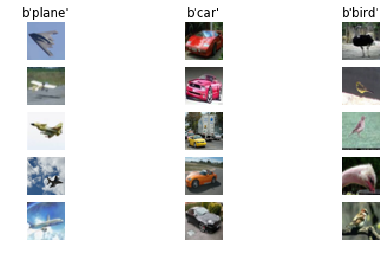

In [8]:
num_classes = len(class_names)
examples_per_class = 5
# We'll create a grid of plots, then populate them with images
f, ax = plt.subplots(examples_per_class, num_classes)
for class_idx in range(len(class_names)):
    # Find the indicies in the examples for this class
    matching_indices = np.where(labels == class_idx)[0]
    for example_n in range(examples_per_class):
        # The images are stored as floats but need to be converted to ints
        # so they display properly
        example = examples[matching_indices[example_n]].astype('uint8')
        ax[example_n, class_idx].imshow(example)
        ax[example_n, class_idx].axis('off')
        plt.axis('off')
        if example_n == 0:
            ax[example_n, class_idx].set_title(class_names[class_idx])
f.set_size_inches(8,4)
plt.show() 

In case that code is a bit of a handful, here's a block you can use to display a single image.

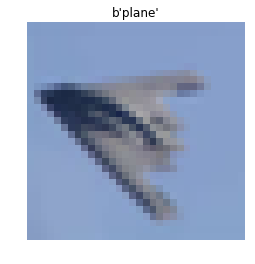

In [10]:
idx = 3
plt.imshow(examples[idx].astype('uint8'))
plt.title(class_names[labels[idx]])
plt.axis('off')
plt.show()

## Prepare the data

In [3]:
# Flatten the images (reshaping from n_examples x 32 x 32 x 3 to n_examples x 3072)
examples = np.reshape(examples, (examples.shape[0], -1))
examples.shape

(1800, 3072)

Next, we'll divide the data into train and test.

In [4]:
# A helpful utility to create balanced splits
# See: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html
sss = StratifiedShuffleSplit(train_size=1400, n_splits=1, 
                             test_size=400, random_state=0)  

for train_index, test_index in sss.split(examples, labels):
    X_train, X_test = examples[train_index], examples[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

In [5]:
print("Train examples: %d" % X_train.shape[0])
print("Test examples: %d" % X_test.shape[0])

Train examples: 1400
Test examples: 400


## Part 1) Complete the kNN classifer
You'll need to modify it to a) compute distance between examples, and b) to work with different values of k.

In [7]:
test_size = X_test.shape[0]
train_size = X_train.shape[0]

# Rows give the distance from a test example to every training example
distance_matrix = np.zeros((test_size, train_size)) 

diff = np.array([X_test[0],]*train_size) - X_train
distance_matrix[0] = np.sqrt(np.sum(np.square(diff),axis=1))

In [28]:
class KNNClassifier(object):
    def __init__(self):
        pass
    
    def train(self, X_train, y_train):
        """
        Train the model.

        Inputs:
        - X_train: A numpy array of shape (train_examples, features) 
        containing the training data.
        - y_train: A numpy array of shape (train_examples,) 
        containing the training labels.
        """
        self.X_train = X_train
        self.y_train = y_train
    
    def distance_matrix(self, X_test):
        """
        Calculate a distance matrix.

        Inputs:
        - X: A numpy array of shape (test_examples, pixels) containing the test data.

        Returns:
        - distances: A numpy array of shape (test_examples, train_examples). 
        Distances[i, j] gives the Euclidean distance between the ith testing point 
        and the jth training point. 
        """
        test_size = X_test.shape[0]
        train_size = self.X_train.shape[0]
        
        # Rows give the distance from a test example to every training example
        distance_matrix = np.zeros((test_size, train_size)) 
        
        ########################################################################
        # TODO: Modify the code below.    
        for i in range(test_size):    
            diff = np.array([X_test[i],]*train_size) - self.X_train
            distance_matrix[i] = np.sqrt(np.sum(np.square(diff),axis=1))
            
        return distance_matrix
        
    def predict(self, X_test, distance_matrix, k=1):
        """
        Predict labels for the testing data.

        Inputs:
        - X_test: A numpy array of shape (test_examples, features) containing the test data.
        - distance_matrix: A previously computed distance matrix, described above.
        
        Returns:
        - predictions: A numpy array of shape (test_examples,). 
        predictions[i] contains the predicted label for the ith testing example. 
        """
          ########################################################################
        # TODO: Modify the code below.   
        test_size = X_test.shape[0]
        predictions = np.zeros(test_size)
        
        for i in range(test_size):
            row = distance_matrix[i]
            ind = np.argsort(row)
            vote = []
            for j in range(k):
                vote.append(y_train[ind[j]])
            predictions[i] = max(set(vote), key=vote.count)
            
        return predictions

In [11]:
classifier = KNNClassifier()
classifier.train(X_train, y_train)
distance_matrix = classifier.distance_matrix(X_test) 
predictions = classifier.predict(X_test, distance_matrix, k=1)

In [12]:
def accuracy(predicted, actual):
    correct = np.sum(predicted == actual)
    total = predicted.shape[0]
    accuracy = float(correct) / total
    return accuracy

acc = accuracy(predictions, y_test)
print('Accuracy: %.2f' % (acc))

if acc > 0.50:
    print ("Congrats! Your classifier is working well on this data.")
else:
    print ("Keep at it.")

Accuracy: 0.52
Congrats! Your classifier is working well on this data.


In [17]:
########################################################################
# TODO: try k=5, give a better score
predictions = classifier.predict(X_test, distance_matrix, k=5)
acc = accuracy(predictions, y_test)
print('Accuracy: %.2f' % (acc))

Accuracy: 0.57


## Part 2) Short answer questions

Just a few sentences each is fine. Please write your answers in-line below.

1) Is the kNN classifier invariant to image orientation?

ANSWER: kNN is variant to image orientation. E.g., if we used the model to make a prediction on a picture of a car that happened to upside down, the input x is change, and then the distances between pictures in kNN change, so may lead to different vote result.

2) What are the pros/cons of using raw pixel values as features? It is sensisble to use them when working with images? Why or why not?

ANSWER: pros: using raw pixel values is simpler and captures lights and shadows info. 
cons: using raw pixel values means some data points may be unnecssaryly overweight than others.
we should not use raw value, but divide by 255, because 'it will help you to remove distortions caused by lights and shadows in an image.'(Anmol Kumar) 

3) Is it important to normalize the data (e.g., by subtracting the mean and dividing by the standard deviation) when working with kNN? Why or why not?

ANSWER: yes, since kNN votes based on sum of square of feature distances, the different range of different feature dimensions may result in that kNN pay too much attension on some features.

## Part 3) Collect your own dataset

In this section, you'll write code to:

* Download a small dataset (say, of 5 images - these can be of anything you like) from the web. You can use the urllib library above to download them.

* Next, convert these images into an appropriate format in NumPy.

* Finally, use your completed classifier above to train a model on these images and make predictions. Report your accuracy.

In [1]:
# load data from keras
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()


/Users/cengjianhuan/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/Users/cengjianhuan/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [20]:
# collect my own training set from mnist
cond0 = np.logical_or(y_train==0,y_train==1)
cond0 = np.logical_or(cond0, y_train==8)
cond0 = cond0[:8000]
X_tr = X_train[np.where(cond0)[0],:]
y_tr = y_train[np.where(cond0)]
print(len(y_tr))

cond1 = np.logical_or(y_test==0,y_test==1)
cond1 = np.logical_or(cond1, y_test==8)
cond1 = cond1[:3000]
X_ts = X_test[np.where(cond1)[0],:]
y_ts = y_test[np.where(cond1)]
print(len(y_ts))


# my label 
# digit 0->0,digit 1->1, digit 8->2
y_tr = [2 if y_tr[i]==8 else y_tr[i] for i in range(len(y_tr))]
y_ts = [2 if y_ts[i]==8 else y_tr[i] for i in range(len(y_ts))]

2454
897


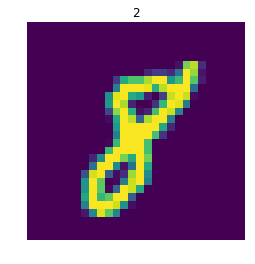

In [22]:
# show data example
idx = 5
plt.imshow(X_tr[idx])
plt.title(y_tr[idx])
plt.axis('off')
plt.show()

In [23]:
X_tr.shape

(2454, 28, 28)

In [24]:
stats.itemfreq(y_ts)

array([[  0, 192],
       [  1, 243],
       [  2, 462]])

In [25]:
stats.itemfreq(y_ts)

array([[  0, 192],
       [  1, 243],
       [  2, 462]])

In [26]:
# convert these images into an appropriate format in NumPy.
X_tr = np.reshape(X_tr, (X_tr.shape[0], -1))/255.0
X_ts = np.reshape(X_ts, (X_ts.shape[0], -1))/255.0
X_tr.shape

(2454, 784)

In [37]:
# train 
classifier = KNNClassifier()
classifier.train(X_tr, y_tr)

# test
distance_matrix = classifier.distance_matrix(X_ts) 
predictions = classifier.predict(X_ts, distance_matrix, k=5)
acc = accuracy(predictions, y_ts)
print('Accuracy: %.2f' % (acc))

if acc > 0.50:
    print ("Congrats! Your classifier is working well on this data.")
else:
    print ("Not Good.")

Accuracy: 0.19
Not Good.


When you're finished, save your notebook (including the output from your final run) and submit your notebook on CourseWorks. Your completed notebook should run end-to-end with no user intervention required.